In [1]:
import os, codecs  
import jieba  
import jieba.analyse
from collections import Counter  
import json
import pandas as pd

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
def get_words(txt):
    # load dictionary 
    jieba.load_userdict("names.txt")
    # parse the article
    seg_list = jieba.cut(txt)
    # frequency count
    c = Counter()  
    for x in seg_list:  
        if len(x)>1 and x != '\r\n':  
            c[x] += 1
    # output the result        
    print('常用詞頻率统計結果')  
    for (k,v) in c.most_common(100):  
        print('%s%s %s  %d' % ('  '*(5-len(k)), k, '*'*int(v/3), v))
    return c    

In [3]:
with codecs.open('novels/射雕前傳.txt', 'r', 'utf8') as f:  
     txt = f.read()  
c1=get_words(txt) 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/y0/3qdcxwtx6jb5mfpzd6pgk6hw0000gn/T/jieba.cache
Loading model cost 1.037 seconds.
Prefix dict has been built succesfully.


常用詞頻率统計結果
      藥師 *******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************  1389
      自己 *******************************************************************************************************************************************************  454
      馮蘅 *****************************************************************************************************  303
      黃藥 ****************************************************************************************************  302
      心中 *****************************************************************************************  268
      什么 *

In [4]:
with codecs.open('novels/射雕前傳.txt', 'r', 'utf8') as f:  
     txt = f.read() 
tags = jieba.analyse.extract_tags(txt, topK=30)
print("關鍵詞:")
print(" ".join(tags))

關鍵詞:
藥師 馮蘅 黃藥 林慕寒 重陽 林慕 師父 一聲 叫道 陽鋒 周伯通 起來 武功 岳詩琪 自己 心下 道長 心中 阿蘅 二人 洪七公 原來 哈哈 鐵崖 爺爺 曲靈 大哥 鐵掌 曲靈風 小蘅


In [5]:
with codecs.open('novels/射雕英雄傳.txt', 'r', 'utf8') as f:  
     txt1 = f.read()  
c2=get_words(txt1) 

常用詞頻率统計結果
      黃蓉 **********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************  2910
    

In [6]:
tags = jieba.analyse.extract_tags(txt1, topK=30)
print("關鍵詞:")
print(" ".join(tags))

關鍵詞:
黃蓉 郭靖 洪七公 陽鋒 說道 周伯通 師父 叫道 藥師 一聲 蓉道 武功 靖道 陽克 甚麼 當下 完顏 裘千仞 原來 出來 笑道 爹爹 功夫 鎮惡 心中 聽得 鐵木 處機 心想 梅超風


In [9]:
def jeiba_to_json(input,output="output.json"):
    #ret=codecs.open(input, 'r', 'utf8') 
    ret = open(input, "r").read()
    seglist = jieba.cut(ret)#, cut_all=False)
    hash = {}
    for item in seglist: 
      if item in hash:
         hash[item] += 1
      else:
         hash[item] = 1
    json.dump(hash,open(output,"w"))
    

In [80]:
jeiba_to_json('novels/射雕前傳.txt')

In [7]:
def jeiba_to_csv(input,output="output.csv"):
    #ret=codecs.open(input, 'r', 'utf8') 
    ret = open(input, "r").read()
    hash = {}
    seglist = jieba.cut(ret)#,cut_all=False)
    for item in seglist: 
      if item in hash:
         hash[item] += 1
      else:
         hash[item] = 1
    
    
    fd = open(output,"w")
    #fd.write(codecs.BOM_UTF8)
    #fd.write("word,count\n")
    
    for k in hash:
        #fd.write("%s,%d\n"%(k.encode("utf8"),hash[k]))
        fd.write("%s,%d\n"%(k,hash[k]))

In [8]:
jeiba_to_csv('novels/射雕前傳.txt')

In [10]:
pre=pd.read_csv("output.csv",names=['name','counts'])

In [11]:
pre.sort('counts',ascending=False)


/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,name,counts
16,，,15496
13,。,4120
5,NaN,3412
6,“,2784
14,”,2767
25,的,2194
175,：,2154
38,是,1746
10,了,1670
23,這,1646


In [39]:
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as font_manager
font_chinese = FontProperties(fname="/Library/Fonts/Songti.ttf")

In [12]:
from matplotlib import rcParams
import matplotlib.font_manager as font_manager


for font in font_manager.findSystemFonts():
  print (font)
#rcParams.update({'font.size': 22})

/usr/X11/lib/X11/fonts/TTF/VeraMono.ttf
/Users/cch/Library/Fonts/ITCEDSCR.TTF
/Library/Fonts/Farisi.ttf
/Library/Fonts/Apple Chancery.ttf
/Users/cch/Library/Fonts/TektonPro-Bold.otf
/System/Library/Fonts/SFCompactDisplay-Light.otf
/usr/X11/lib/X11/fonts/OTF/SyrCOMJerusalemBold.otf
/usr/X11/lib/X11/fonts/TTF/Vera.ttf
/Users/cch/Library/Fonts/Allura-Regular.ttf
/Users/cch/Library/Fonts/SourceHanSansTWHK-Light.otf
/Library/Fonts/Verdana.ttf
/System/Library/Fonts/SFNSDisplay-UltralightItalic.otf
/Library/Fonts/STIXNonUniBolIta.otf
/Library/Fonts/Courier New.ttf
/Library/Fonts/STIXSizFourSymBol.otf
/Library/Fonts/Arial Bold.ttf
/System/Library/Fonts/Symbol.ttf
/Library/Fonts/STIXSizFourSymReg.otf
/Library/Fonts/Silom.ttf
/Users/cch/Library/Fonts/SourceHanSansTWHK-Bold.otf
/Library/Fonts/STIXGeneralItalic.otf
/Users/cch/Library/Fonts/SHLOP.TTF
/Library/Fonts/STIXSizThreeSymReg.otf
/Library/Fonts/Tahoma.ttf
/Library/Fonts/Arial Italic.ttf
/System/Library/Fonts/SFCompactDisplay-Thin.otf
/Users

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['chinese'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


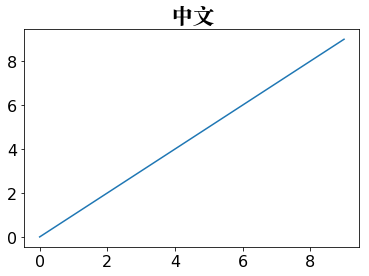

In [41]:
#rcParams['font.family'] = 'chinese'
rcParams.update({'font.size': 16})
font_chinese = FontProperties(fname="/Library/Fonts/Songti.ttf")

x = range(10)
plt.plot(x)
plt.title(r"中文", 
          fontproperties=font_chinese, 
          fontsize=22)
plt.show()

In [130]:
#import codecs

with codecs.open('names.txt', encoding="utf8") as f:
    # 去掉结尾的换行符
    data = [line.strip() for line in f]

novels = data[::2]
names = data[1::2]

novel_names = {k: v.split() for k, v in zip(novels, names)}

#for name in novel_names['射雕英雄傳']:
#    print(name)

In [81]:
font_chinese = FontProperties(fname="fireflysung.ttf")
font_bold = FontProperties(fname="/Library/Fonts/Songti.ttf")
rcParams.update({'font.size': 20})

def find_main_charecters(novel, num=10):
    with codecs.open('novels/{}.txt'.format(novel), encoding="utf8") as f:
        data = f.read()
    chars = novel_names[novel]
    count = [data.count(x) for x in chars]

    b=sorted(zip(chars,count),key=lambda x:x[1])
    n=[]
    freq=[]
    for (k,v) in b[-num:]: 
        n.append(k)
        freq.append(v)

    plt.figure(figsize=(12,6))
    plt.title(novel, fontproperties=font_bold,fontsize=22)
    plt.xlabel("詞彙頻率", fontproperties=font_chinese,fontsize=16)
    plt.yticks(list(range(num)), n[-num:], fontproperties=font_chinese,fontsize=16)
    plt.barh(list(range(num)),freq[-num:])

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['chinese'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


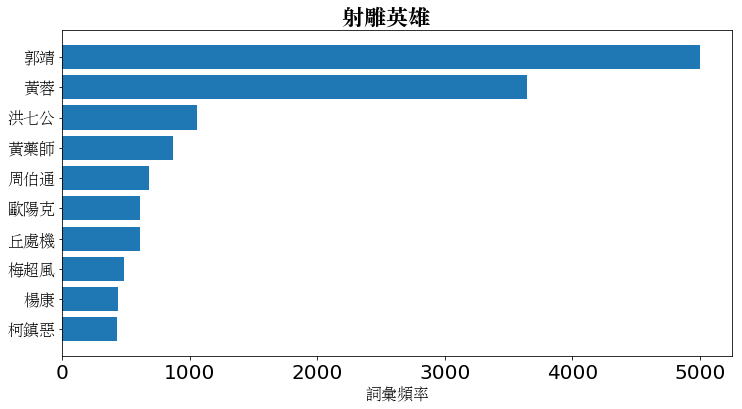

In [82]:
find_main_charecters("射雕英雄傳")

In [131]:
for _, names in novel_names.items():
    for name in names:
        jieba.add_word(name)

with codecs.open("kungfu.txt", encoding="utf8") as f:
    kungfu_names = [line.strip() for line in f]
with codecs.open("bangs.txt", encoding="utf8") as f:
    bang_names = [line.strip() for line in f]

for name in kungfu_names:
    jieba.add_word(name)

for name in bang_names:
    jieba.add_word(name)

In [132]:
novels = ["射雕英雄傳"]

sentences = []

for novel in novels:
    print("處理：{}".format(novel))
    with codecs.open('novels/{}.txt'.format(novel), encoding="utf8") as f:
        sentences += [list(jieba.cut(line.strip())) for line in f]

處理：射雕英雄傳


In [133]:
import gensim
model = gensim.models.Word2Vec(sentences, size=100,  window=5, 
                               min_count=5, workers=4)

In [134]:
for k, s in model.most_similar(positive=["楊康"]):
    print(k, s)

周伯通 0.9740411639213562
穆念慈 0.9720509052276611
柯鎮惡 0.9659091234207153
朱聰 0.9606814384460449
華箏 0.9540569186210632
陸冠英 0.9529356360435486
洪七公 0.9408906698226929
裘千仞 0.9401257634162903
完顏洪烈 0.9343582391738892
包惜弱 0.9342997074127197


In [92]:
for k, s in model.most_similar(positive=["周伯通"]):
    print(k, s)

洪七公 0.968989372253418
陸冠英 0.9523816704750061
楊康 0.9516764283180237
柯鎮惡 0.9322394728660583
完顏洪烈 0.9314149618148804
楊鐵心 0.9299013614654541
華箏 0.9289057850837708
穆念慈 0.9278597235679626
郭靖喜 0.9242468476295471
包惜弱 0.9240400791168213


In [93]:
for k, s in model.most_similar(positive=["丐幫"]):
    print( k, s)

全真教 0.9633142352104187
全真 0.9520622491836548
鐵掌幫 0.9512737989425659
蓋世 0.9507054090499878
派 0.9472363591194153
承人 0.9472088813781738
當年 0.94377601146698
人物 0.9396727681159973
京師 0.9353821873664856
大宗 0.9346222877502441


In [94]:
for k, s in model.most_similar(positive=["全真教"]):
    print( k, s)

派 0.9850509762763977
全真 0.9659880995750427
丐幫 0.9633142948150635
用兵 0.9613266587257385
承人 0.9608654379844666
鐵掌幫 0.9590548276901245
當年 0.9484529495239258
人物 0.9475505352020264
神通 0.9469367265701294
宋 0.9457253217697144


In [95]:
def find_relationship(a, b, c):
    """
    返回 d 
    a to b， like  c to d     
    """
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print("“{}” 與 “{}” 的關係，  如同 “{}” 和 “{}” 的關係".format(a, b, c, d))

In [96]:
find_relationship("郭靖", "黃蓉","洪七公")

“郭靖” 與 “黃蓉” 的關係，  如同 “洪七公” 和 “周伯通” 的關係


In [97]:
find_relationship("黃藥師", "黃蓉","楊康")

“黃藥師” 與 “黃蓉” 的關係，  如同 “楊康” 和 “包惜弱” 的關係


In [98]:
for k, s in model.most_similar(positive=["郭靖"]):
    print(k, s)

黃蓉 0.9584494829177856
歐陽克 0.9360447525978088
穆念慈 0.9321125745773315
歐陽鋒 0.9290100336074829
洪七公 0.9149225354194641
周伯通 0.8914445042610168
楊康 0.8894596099853516
柯鎮惡 0.8809470534324646
陸冠英 0.8713581562042236
裘千仞 0.8581026792526245


Categorized the Cast
---

In [99]:
#all_names = np.array(filter(lambda c: c in model, novel_names["射雕英雄傳"]))
#word_vectors = np.array(map(lambda c: model[c], all_names))
all_names = np.array([c for c in novel_names["射雕英雄傳"] if c in model])
word_vectors = np.array([model[c] for c in all_names])

In [100]:
N = 3

label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print("\n類别{}：".format(c+1))
    for idx, name in enumerate(all_names[label==c]):
        print(name, end=' ')
        if idx % 10 == 9:
            print() 
    print()


類别1：
馬青雄 小沙彌 木華黎 沈青剛 書記 天竺僧人 孫不二 呂文德 喬寨主 曲三 
湯祖德 完顏洪熙 吳青烈 赤老溫 張十五 忽都虎 者勒米 郝大通 枯木 胖婦人 
啞梢公 錢青健 蓋運聰 梁長老 博爾忽 彭長老 童子 焦木和尚 簡管家 裘千丈 
瘦丐 譚處端 樵子 

類别2：
馬鈺 一燈大師 書生 王處一 王罕 尹志平 李萍 全金發 陳玄風 陸乘風 
沙通天 農夫 靈智上人 張阿生 拖雷 段天德 郭嘯天 侯通海 南希仁 胖子 
都史 桑昆 鐵木真 梁子翁 梅超風 漁人 程瑤迦 韓寶駒 韓小瑩 魯有腳 
彭連虎 窩闊台 簡長老 察合台 黎生 

類别3：
丘處機 包惜弱 華箏 完顏洪烈 朱聰 陸冠英 楊康 楊鐵心 歐陽克 周伯通 
郭靖 洪七公 柯鎮惡 黃蓉 黃藥師 穆念慈 裘千仞 


In [101]:
N = 4

c = sp.stats.mode(label).mode

remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]
remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print("\n類别{}：".format(c+1))
    for idx, name in enumerate(remain_names[remain_label==c]):
        print(name, end=' ')
        if idx % 10 == 9:
            print() 
    print()



類别1：
丘處機 包惜弱 華箏 完顏洪烈 朱聰 陸冠英 楊康 楊鐵心 周伯通 柯鎮惡 
黃藥師 穆念慈 裘千仞 

類别2：
馬青雄 小沙彌 沈青剛 書記 天竺僧人 呂文德 喬寨主 曲三 湯祖德 吳青烈 
張十五 忽都虎 者勒米 胖婦人 啞梢公 錢青健 蓋運聰 梁長老 童子 焦木和尚 
瘦丐 

類别3：
歐陽克 郭靖 洪七公 黃蓉 

類别4：
木華黎 孫不二 完顏洪熙 赤老溫 郝大通 枯木 博爾忽 彭長老 簡管家 裘千丈 
譚處端 樵子 


In [102]:
import scipy.cluster.hierarchy as sch

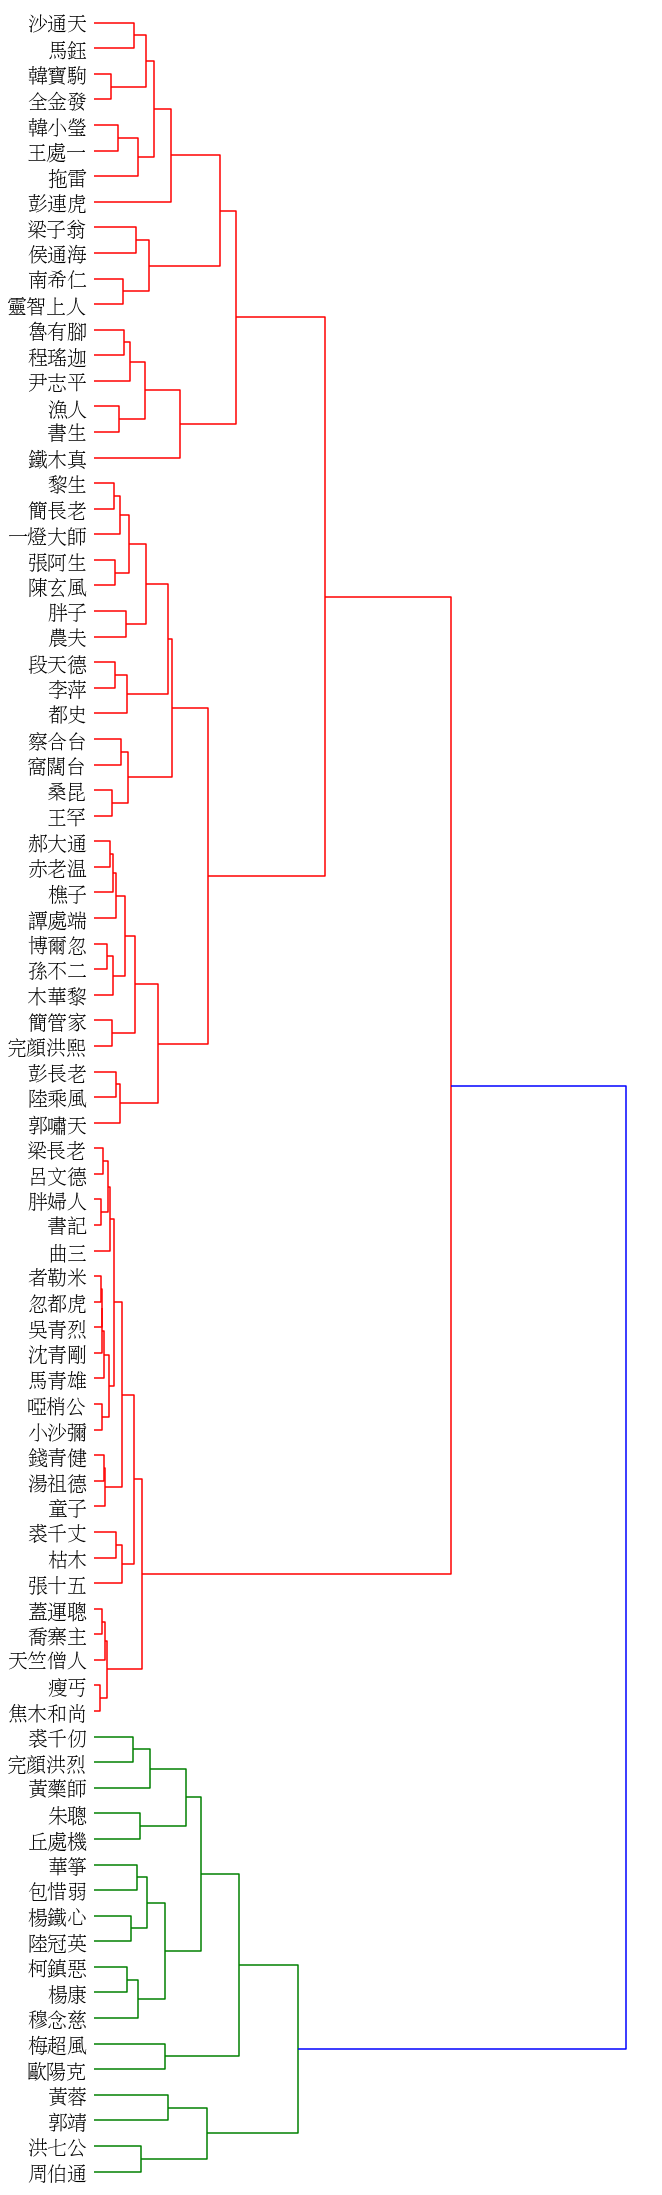

In [104]:
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], 
                  fontproperties=font_chinese)
ax.set_frame_on(False)

plt.show()

In [135]:
#novels = ["射雕前傳","神雕俠侶","射雕英雄傳"]
novels = ["射雕前傳"]
sentences = []

for novel in novels:
    print("處理：{}".format(novel))
    with codecs.open('novels/{}.txt'.format(novel), encoding="utf8") as f:
        sentences += [list(jieba.cut(line.strip())) for line in f]

處理：射雕前傳


In [136]:
model0 = gensim.models.Word2Vec(sentences, size=100, window=5, 
                               min_count=5, workers=4)

In [137]:
for k, s in model0.most_similar(positive=["黃藥師"]):
    print(k, s)

馮蘅 0.9995855689048767
對 0.9986703395843506
呵呵 0.9978066086769104
沉吟 0.9973041415214539
口氣 0.9969092607498169
曲靈風 0.9968676567077637
聽 0.9968503713607788
問 0.9967167973518372
長嘆 0.9967018365859985
愣 0.9965502619743347


/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['chinese'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


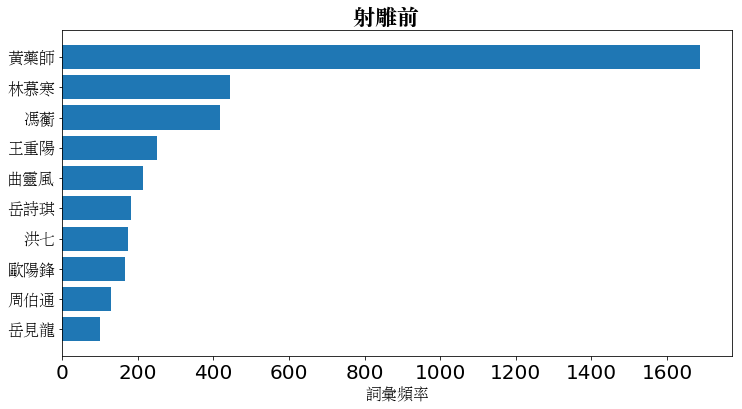

In [138]:
find_main_charecters("射雕前傳")

In [139]:
def find_relationship(a, b, c):
    """
    返回 d 
    a to b， like  c to d     
    """
    d, _ = model0.most_similar(positive=[c, b], negative=[a])[0]
    print("“{}” 與 “{}” 的關係，  如同 “{}” 和 “{}” 的關係".format(a, b, c, d))

In [140]:
find_relationship("黃藥師",'馮蘅',"林朝英")

“黃藥師” 與 “馮蘅” 的關係，  如同 “林朝英” 和 “燕馭軻” 的關係


In [141]:
all_names = np.array([c for c in novel_names["射雕前傳"] if c in model0])
word_vectors = np.array([model0[c] for c in all_names])

In [142]:
N = 3

label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print("\n類别{}：".format(c+1))
    for idx, name in enumerate(all_names[label==c]):
        print(name, end=' ')
        if idx % 10 == 9:
            print() 
    print()


類别1：
洪七 公孫書寧 林朝英 燕馭軻 公孫嘆 獨孤 馬鈺 朱熹 趙擴 段智興 
辛棄疾 邱處機 陳璧 陳青眉 武眠風 陸阡 

類别2：
路不平 有天道長 蕭洞玄 杜夢乾 孫不二 戴復古 馬昭容 岳珂 寧宗 趙湛 
歐陽隱 李晞古 柯鎮惡 柯辟邪 楊遜之 郭元振 史威信 陳處晉 武三通 朱子柳 
梅超風 俅千仞 陳玄風 陸乘風 馮默風 梅若華 

類别3：
黃藥師 馮蘅 林慕寒 王重陽 歐陽鋒 岳詩琪 周伯通 曲靈風 郭旌陽 楊鐵崖 
岳見龍 趙宗印 小蘅 神合子 蔣振宇 參寥 慧才 


In [143]:
N = 4

c = sp.stats.mode(label).mode

remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]
remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print("\n類别{}：".format(c+1))
    for idx, name in enumerate(remain_names[remain_label==c]):
        print(name, end=' ')
        if idx % 10 == 9:
            print() 
    print()



類别1：
洪七 公孫書寧 林朝英 燕馭軻 公孫嘆 獨孤 馬鈺 段智興 辛棄疾 邱處機 
陳青眉 蔣振宇 

類别2：
黃藥師 馮蘅 林慕寒 王重陽 歐陽鋒 曲靈風 

類别3：
岳詩琪 周伯通 郭旌陽 楊鐵崖 岳見龍 趙宗印 小蘅 神合子 參寥 慧才 


類别4：
朱熹 趙擴 陳璧 武眠風 陸阡 


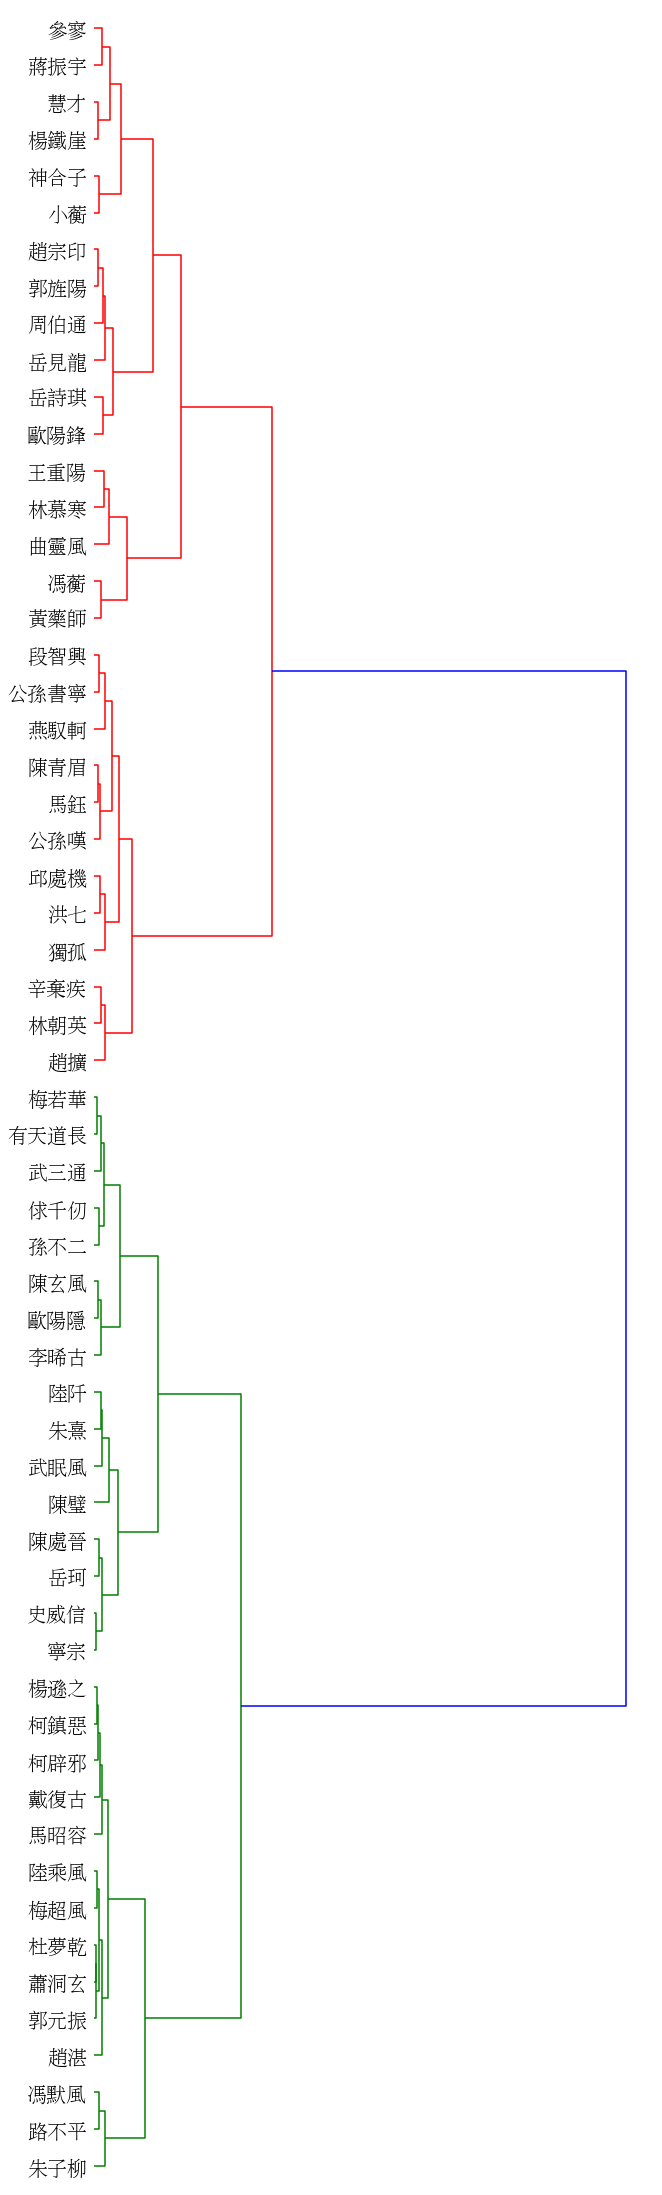

In [144]:
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], 
                  fontproperties=font_chinese)
ax.set_frame_on(False)

plt.show()

In [65]:
#novels = ["射雕前傳","神雕俠侶","射雕英雄傳"]
novels = ["神雕俠侶"]
sentences = []

for novel in novels:
    print("處理：{}".format(novel))
    with codecs.open('novels/{}.txt'.format(novel), encoding="utf8") as f:
        sentences += [list(jieba.cut(line.strip())) for line in f]

處理：神雕俠侶


In [66]:
model2 = gensim.models.Word2Vec(sentences, size=100, window=5, 
                               min_count=5, workers=4)

In [67]:
for k, s in model2.most_similar(positive=["楊過"]):
    print(k, s)

小龍女 0.9707618951797485
郭襄 0.9248459935188293
李莫愁 0.9095749855041504
郭芙 0.8870004415512085
周伯通 0.8739666938781738
趙志敬 0.8405390381813049
黃蓉 0.8403893709182739
裘千尺 0.8378402590751648
陸無雙 0.8320661187171936
一眼 0.814069926738739


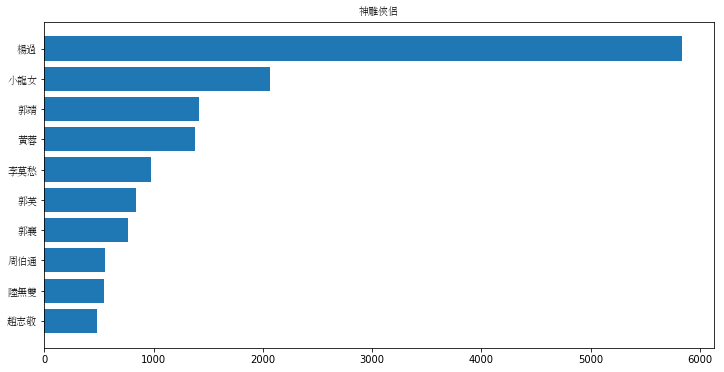

In [89]:
find_main_charecters("神雕俠侶")

In [70]:
def find_relationship(a, b, c):
    """
    返回 d 
    a to b， like  c to d     
    """
    d, _ = model2.most_similar(positive=[c, b], negative=[a])[0]
    print("“{}” 與 “{}” 的關係，  如同 “{}” 和 “{}” 的關係".format(a, b, c, d))

In [71]:
find_relationship("郭靖",'黃蓉',"小龍女")

“郭靖” 與 “黃蓉” 的關係，  如同 “小龍女” 和 “楊過” 的關係


In [72]:
for k, s in model2.most_similar(positive=["楊過"]):
    print(k, s)

小龍女 0.9707618951797485
郭襄 0.9248459935188293
李莫愁 0.9095749855041504
郭芙 0.8870004415512085
周伯通 0.8739666938781738
趙志敬 0.8405390381813049
黃蓉 0.8403893709182739
裘千尺 0.8378402590751648
陸無雙 0.8320661187171936
一眼 0.814069926738739


In [73]:
all_names = np.array([c for c in novel_names["神雕俠侶"] if c in model2])
word_vectors = np.array([model2[c] for c in all_names])

In [74]:
N = 4
label = KMeans(N).fit(word_vectors).labels_
c = sp.stats.mode(label).mode

remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]
remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print("\n類别{}：".format(c+1))
    for idx, name in enumerate(remain_names[remain_label==c]):
        print(name, end=' ')
        if idx % 10 == 9:
            print() 
    print()



類别1：
馬鈺 大頭鬼 一燈大師 王處一 王志坦 天竺僧 少婦 公孫綠萼 孫不二 馮默風 
史伯威 史叔剛 史季強 呂文德 李志常 張君寶 武三娘 林朝英 耶律晉 耶律燕 
鹿清篤 魯有腳 

類别2：
小龍女 李莫愁 陸無雙 楊過 周伯通 郭靖 郭芙 郭襄 黃蓉 

類别3：
尹克西 尼摩星 瀟湘子 

類别4：
馬光佐 尹志平 丘處機 公孫止 孫婆婆 達爾巴 朱子柳 完顏萍 武三通 武修文 
忽必烈 耶律齊 金輪法王 柯鎮惡 趙志敬 洪七公 黃藥師 裘千尺 霍都 樊一翁 



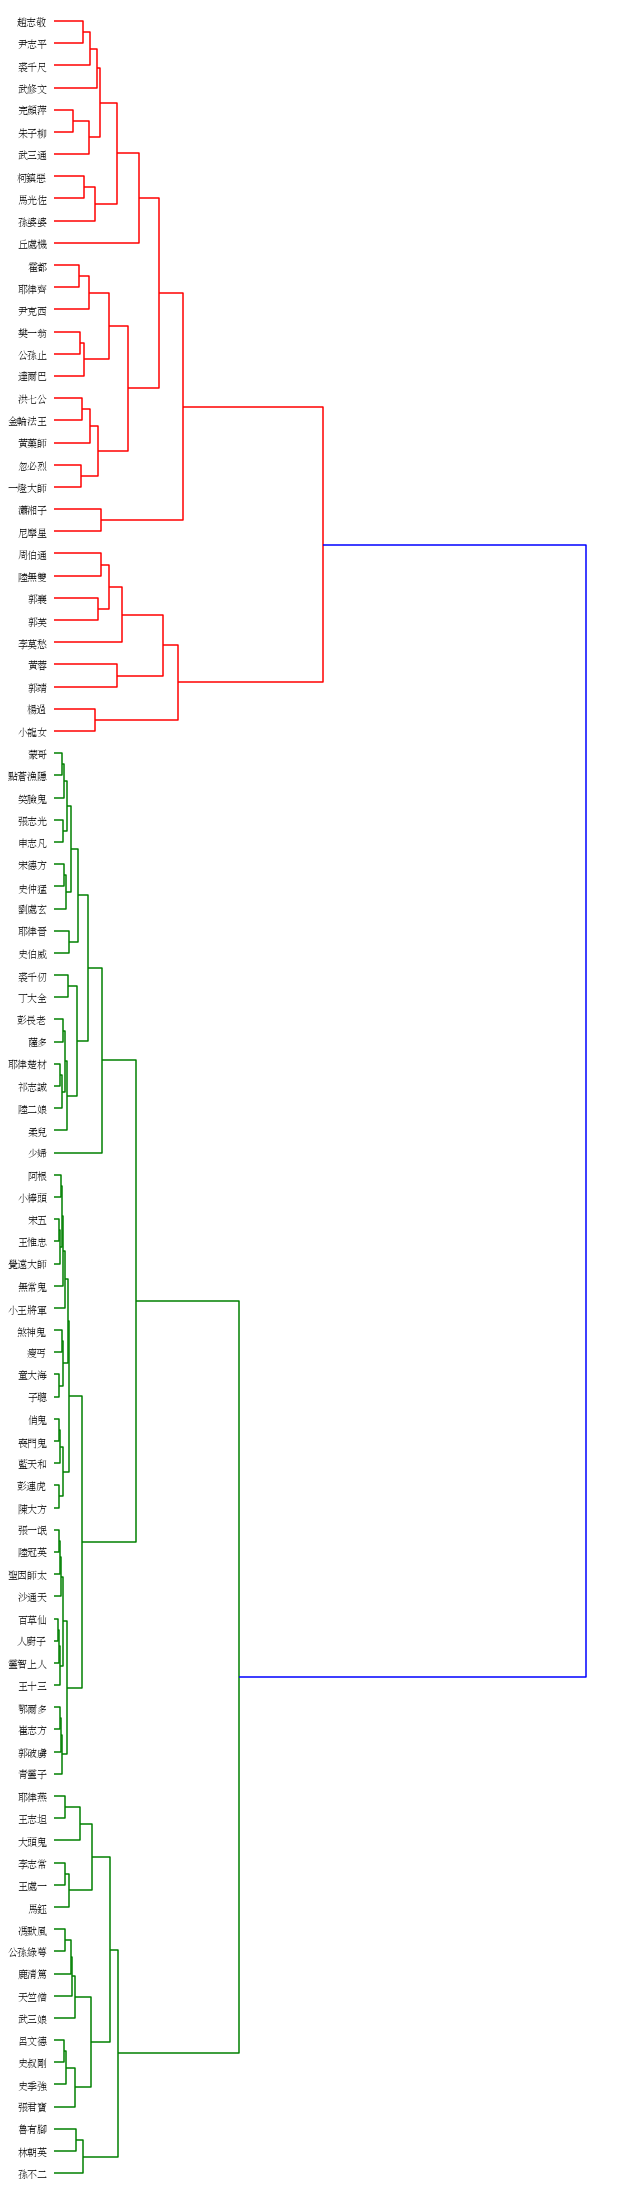

In [76]:
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], 
                  fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

In [ ]:
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from wordcloud import WordCloud


def wordcloudplot(txt):
    path = r'C:\Windows\Fonts\verdana.ttf'
    path = unicode(path, 'utf8').encode('gb18030')
    alice_mask = np.array(PIL.Image.open('she.jpg'))
    wordcloud = WordCloud(font_path=path,
                          background_color='white',
                          margin=1, width=10, height=2, mask=alice_mask,
                          max_words=200, max_font_size=1000, random_state=42)
    wordcloud = wordcloud.generate(txt)
    wordcloud.to_file('she2.jpg')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


def main():
    a = []
    # b = {}
    f = open('nms.txt', 'r').read()
    words = list(jieba.cut(f))
    for index, word in enumerate(words):
        if len(word) > 1:
            a.append(word.encode('utf-8'))
            # b.setdefault(word, []).append(index)
    # for k in b:
    #     b[k] = len(b[k])

    # dict1 = sorted(b.iteritems(),
    #                key=lambda d: d[1],
    #                reverse=True)
    # print dict1
    # for k in dict1:
    #     print list(k)[0], list(k)[1]
    txt = ' '.join(a)
    wordcloudplot(txt)


In [ ]:
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from wordcloud import WordCloud


def wordcloudplot(txt):
    path = r'C:\Windows\Fonts\verdana.ttf'
    path = unicode(path, 'utf8').encode('gb18030')
    alice_mask = np.array(PIL.Image.open('she.jpg'))
    wordcloud = WordCloud(font_path=path,
                          background_color='white',
                          margin=1, width=10, height=2, mask=alice_mask,
                          max_words=200, max_font_size=1000, random_state=42)
    wordcloud = wordcloud.generate(txt)
    wordcloud.to_file('she2.jpg')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


def main():
    a = []
    # b = {}
    f = open('nms.txt', 'r').read()
    words = list(jieba.cut(f))
    for index, word in enumerate(words):
        if len(word) > 1:
            a.append(word.encode('utf-8'))
            # b.setdefault(word, []).append(index)
    # for k in b:
    #     b[k] = len(b[k])

    # dict1 = sorted(b.iteritems(),
    #                key=lambda d: d[1],
    #                reverse=True)
    # print dict1
    # for k in dict1:
    #     print list(k)[0], list(k)[1]
    txt = ' '.join(a)
    wordcloudplot(txt)
